In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
from google.colab import drive

# Mount Google Drive (if not already mounted)
drive.mount('/content/drive')

# Fix the path to the zip file - Remove the extra //content
zip_path = '/content/drive/MyDrive/Colab Notebooks/descargas_kaggle/Segmentaciones.zip'
extract_path = '/content/dataset'  # Carpeta de destino

# Extraer
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Comprobar contenido
import os
os.listdir(extract_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['Segmentaciones']

In [ ]:
# Comprobar el contenido de la carpeta "dataset"
dataset_contents = os.listdir("/content/dataset")
print(f"Contents of /content/dataset: {dataset_contents}")

Contents of /content/dataset: ['Segmentaciones']


In [ ]:
# Comprobar el contenido de la carpeta "dataset"
dataset_contents = os.listdir("/content/dataset")
print(f"Contents of /content/dataset: {dataset_contents}")

Contents of /content/dataset: ['Segmentaciones']


In [ ]:
# Comprobar el contenido de "Segmentaciones"
segmentaciones_contents = os.listdir("/content/dataset/Segmentaciones")
print(f"Contents of /content/dataset/Segmentaciones: {segmentaciones_contents}")

Contents of /content/dataset/Segmentaciones: ['a. Training Set', 'b. Testing Set']


In [ ]:
data_dir = "/content/dataset/Segmentaciones/a. Training Set"

In [ ]:
import numpy as np
import cv2
import os

data_dir = "/content/dataset/Segmentaciones/a. Training Set"
sub_folders = os.listdir(data_dir)
print(len(sub_folders))

5


In [ ]:
images = []
labels = []

# **Preprocesamiento**

In [ ]:
for sub_folder in sub_folders:
    label = sub_folder

    # Constructing the path to the current sub_folder
    path = os.path.join(data_dir, sub_folder)

    # Listing all the images in the sub_folder
    sub_folder_images = os.listdir(path)

    for image_name in sub_folder_images:
        image_path = os.path.join(path, image_name)

        # Loading the image using OpenCV
        img = cv2.imread(image_path)

        # Convert the image to grayscale
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Resize the image to (256, 256 )
        resized_img = cv2.resize(gray_img, (256, 256))

        # Append the images to the image list
        images.append(resized_img)

        # Append the labels
        labels.append(label)

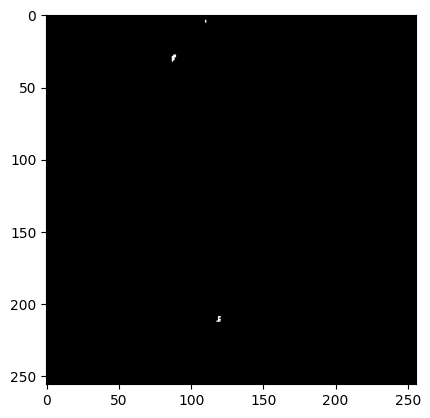

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(resized_img, cmap='gray')

In [ ]:
images = np.array(images)
labels = np.array(labels)

In [ ]:
img_resized = cv2.resize(resized_img, (256,256), )
img_resized = cv2.bitwise_not(img_resized)

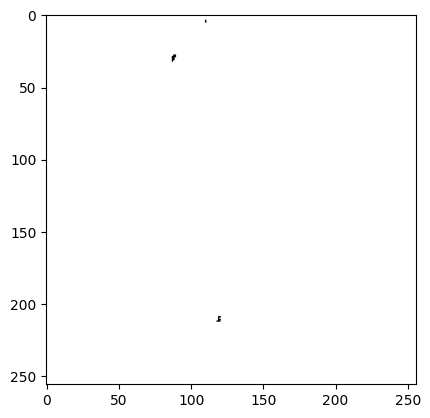

In [ ]:
import os

# Ruta del directorio
Numeros = '/content/segmentacion'

# Crear el directorio si no existe
os.makedirs(Numeros, exist_ok=True)

# Mostrar y guardar la imagen
plt.imshow(img_resized, cmap='gray')
plt.savefig(os.path.join(Numeros, "abc.png"))  # Guardar en el directorio creado


In [ ]:
train_dir = "/content/dataset/Segmentaciones/a. Training Set"

In [ ]:
test_dir = "/content/dataset/Segmentaciones/b. Test Set"

In [ ]:
images = np.array(images)
labels = np.array(labels)

In [ ]:
!pip install scikit-learn

In [ ]:
# Importar train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

In [ ]:
# Preprocessing: visualization of variables and image normalization.
train_images.shape

(406, 256, 256)

In [ ]:
len(train_labels)

406

In [ ]:
train_labels

array(['3. Hard Exudates', '3. Hard Exudates', '2. Haemorrhages',
       '5. Optic Disc', '5. Optic Disc', '5. Optic Disc',
       '3. Hard Exudates', '4. Soft Exudates', '4. Soft Exudates',
       '2. Haemorrhages', '1. Microaneurysms', '1. Microaneurysms',
       '2. Haemorrhages', '3. Hard Exudates', '1. Microaneurysms',
       '4. Soft Exudates', '4. Soft Exudates', '4. Soft Exudates',
       '5. Optic Disc', '2. Haemorrhages', '2. Haemorrhages',
       '4. Soft Exudates', '3. Hard Exudates', '2. Haemorrhages',
       '5. Optic Disc', '3. Hard Exudates', '1. Microaneurysms',
       '1. Microaneurysms', '1. Microaneurysms', '3. Hard Exudates',
       '5. Optic Disc', '1. Microaneurysms', '3. Hard Exudates',
       '2. Haemorrhages', '1. Microaneurysms', '3. Hard Exudates',
       '3. Hard Exudates', '5. Optic Disc', '4. Soft Exudates',
       '4. Soft Exudates', '3. Hard Exudates', '1. Microaneurysms',
       '1. Microaneurysms', '1. Microaneurysms', '4. Soft Exudates',
       '1. M

In [ ]:
test_images.shape

(102, 256, 256)

In [ ]:
len(test_labels)

102

In [ ]:
# Normalization of pixel values.
train_images = train_images / 255.0
test_images = test_images / 255.0

# **Estructura y entrenamiento de la Red Neuronal Artificial Convolucional (CNN)**

In [ ]:
from tensorflow.keras import models, layers
model = models.Sequential()

In [ ]:
# Convolutional part
model = models.Sequential()
layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(128, (3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


(<MaxPooling2D name=max_pooling2d_2, built=False>,)

In [ ]:
# Learning part
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
import tensorflow as tf
# Model Compliation: Features
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from keras.utils import to_categorical

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder on the labels and transform them to numerical labels
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

# Convert numerical labels to one-hot encoded format
train_labels_one_hot = to_categorical(train_labels_encoded)
test_labels_one_hot = to_categorical(test_labels_encoded)

#**CNN Accuracy Results**

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step - accuracy: 0.4127 - loss: 1.9819 - val_accuracy: 0.8137 - val_loss: 1.3468
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.9820 - loss: 1.0577 - val_accuracy: 0.8922 - val_loss: 0.9973
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 1.0000 - loss: 0.6971 - val_accuracy: 0.9020 - val_loss: 0.7735
Epoch 4/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 1.0000 - loss: 0.4563 - val_accuracy: 0.9216 - val_loss: 0.6197
Epoch 5/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 1.0000 - loss: 0.3392 - val_accuracy: 0.9216 - val_loss: 0.5163
Epoch 6/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 1.0000 - loss: 0.2187 - val_accuracy: 0.9314 - val_loss: 0.4495
Epoch 7/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 1.0000 - loss: 0.1930 - val_accuracy: 0.9118 - val_loss: 0.4086
Epoch 8/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 1.0000 - loss: 0.1249 - val_accuracy: 0.9314 - val_loss: 0

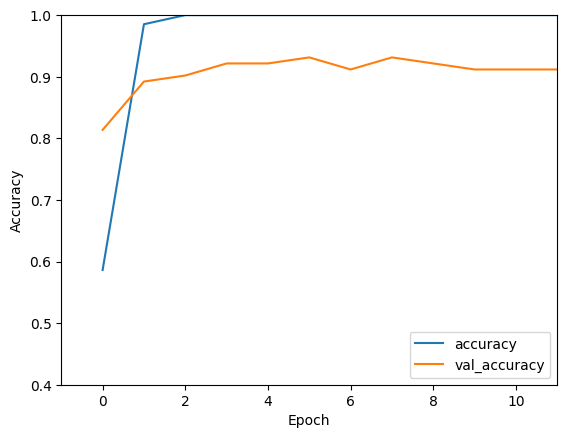

4/4 - 0s - 22ms/step - accuracy: 0.9118 - loss: 0.2943


In [ ]:
# Train the model and capture the training history
history = model.fit(train_images, train_labels_encoded, epochs=15,
                    validation_data=(test_images, test_labels_encoded))


# Plotting the training and validation accuracies
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.xlim([-1, 11])
plt.legend(loc='lower right')
plt.show()

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels_encoded, verbose=2)


# **Predictions with the trained CNN.**

In [ ]:
predictions = model.predict(test_images)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [ ]:
x = predictions[1]
y = test_labels[1]
print("La red dice que la imagen es clase " + str(x) + " y la clase verdadera es: " + y)

La red dice que la imagen es clase [1.2806157e-04 1.5346549e-04 1.5178043e-06 9.9971104e-01 3.9969177e-06
 9.9826693e-08 3.5175177e-07 1.0223716e-06 1.8059757e-07 1.9332745e-07] y la clase verdadera es: 4. Soft Exudates


In [ ]:
x = predictions[50]
y = test_labels[50]
print("La red dice que la imagen es clase " + str(x) + " y la clase verdadera es: " + y)

La red dice que la imagen es clase [8.59571737e-05 2.41676753e-05 5.71126520e-06 9.99872684e-01
 8.50405650e-06 2.26734159e-07 5.66127483e-07 1.46426260e-06
 1.07765345e-07 5.63151843e-07] y la clase verdadera es: 4. Soft Exudates


In [ ]:
x = predictions[8]
y = test_labels[8]
print("La red dice que la imagen es clase " + str(x) + " y la clase verdadera es: " + y)

La red dice que la imagen es clase [3.5323293e-03 7.6792622e-04 9.2625525e-04 9.9273229e-01 6.3174119e-04
 2.0174128e-04 1.7339201e-04 5.7358691e-04 2.0762700e-04 2.5294279e-04] y la clase verdadera es: 4. Soft Exudates


In [ ]:
x = predictions[32]
y = test_labels[32]
print("La red dice que la imagen es clase " + str(x) + " y la clase verdadera es: " + y)

La red dice que la imagen es clase [5.8332432e-07 9.0905701e-07 8.1539078e-08 9.9999827e-01 6.4152270e-09
 2.0612276e-10 2.1604611e-10 6.0895300e-10 2.3773186e-10 1.3234777e-10] y la clase verdadera es: 4. Soft Exudates


In [ ]:
x = predictions[29]
y = test_labels[29]
print("La red dice que la imagen es clase " + str(x) + " y la clase verdadera es: " + y)

La red dice que la imagen es clase [4.9223359e-05 9.9993461e-01 1.1937277e-05 3.1890759e-06 9.9243778e-07
 1.6732140e-09 4.5419908e-09 8.2717104e-09 1.0956187e-08 2.1978637e-09] y la clase verdadera es: 2. Haemorrhages


In [ ]:
x = predictions[30]
y = test_labels[30]
print("La red dice que la imagen es clase " + str(x) + " y la clase verdadera es: " + y)

La red dice que la imagen es clase [4.6115938e-06 3.2736418e-06 7.5678901e-07 2.0597147e-07 9.9999112e-01
 1.3664202e-10 1.7124271e-10 2.8136400e-09 9.4252739e-09 1.8633374e-10] y la clase verdadera es: 5. Optic Disc


In [ ]:
x = predictions[100]
y = test_labels[100]
print("La red dice que la imagen es clase " + str(x) + " y la clase verdadera es: " + y)

La red dice que la imagen es clase [8.2480028e-06 2.7963512e-08 4.0534896e-06 3.3939573e-09 9.9998772e-01
 1.6502459e-11 1.4457149e-11 3.2024111e-10 1.5795444e-09 3.0548512e-11] y la clase verdadera es: 5. Optic Disc


In [ ]:
x = predictions[49]
y = test_labels[49]
print("La red dice que la imagen es clase " + str(x) + " y la clase verdadera es: " + y)

La red dice que la imagen es clase [4.4392799e-03 2.8669757e-03 9.8595029e-01 1.2359518e-03 1.5260068e-03
 9.8676246e-04 6.4839236e-04 8.7615405e-04 9.1412215e-04 5.5591634e-04] y la clase verdadera es: 3. Hard Exudates


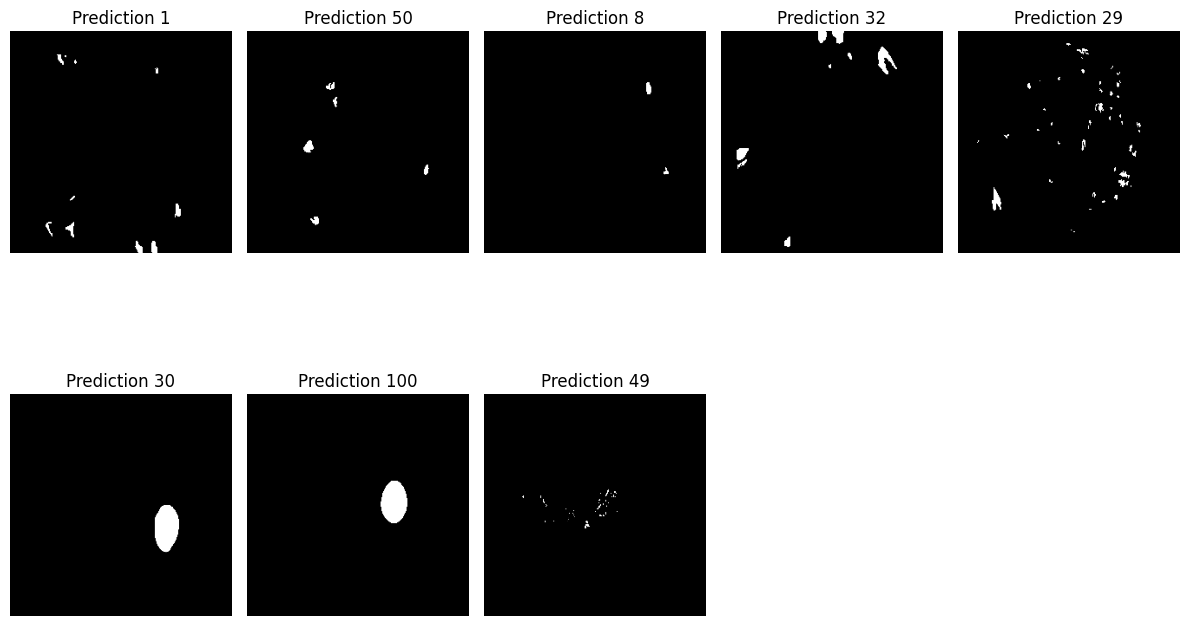

In [ ]:
import matplotlib.pyplot as plt

# Indices of predictions to display
indices = [1,50,8,32,29,30,100,49]

# Assuming test_images contains the images
images_to_show = [test_images[i] for i in indices]

# Display the images
plt.figure(figsize=(12, 8))
for i, image in enumerate(images_to_show, 1):
    plt.subplot(2, 5, i)
    plt.imshow(image, cmap='gray')
    plt.title(f"Prediction {indices[i-1]}")
    plt.axis('off')

plt.tight_layout()
plt.show()